# The Python ecosystem - The pandas library

The [pandas library](https://pandas.pydata.org/) was created by [Wes McKinney](http://wesmckinney.com/) in 2011. pandas provides **data structures** and **functions** 
for manipulating, processing, cleaning and crunching data. In the Python ecosystem pandas is the state-of-the-art tool for working with tabular or spreadsheet-like data  in which each column may be a different type (`string`, `numeric`, `date`, or otherwise). pandas provides sophisticated indexing functionality to make it easy to reshape, slice and dice, perform aggregations, and select subsets of data. pandas relies on other packages, such as [NumPy](http://www.numpy.org/) and [SciPy](https://scipy.org/scipylib/index.html). 
Further pandas integrates [matplotlib](https://matplotlib.org/) for plotting. 


Once installed (for details refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/install.html)), pandas is imported by using the canonical alias `pd`.

In [1]:
import pandas as pd

The pandas library has two workhorse data structures: __*Series*__ and __*DataFrame*__.

* one dimensional `pd.Series` object
* two dimensional `pd.DataFrame` object

***

## The `pd.Series` object

Data generation

In [2]:
# import the random module from numpy
from numpy import random 
# set seed for reproducibility
random.seed(123) 
# generate 26 random integers between -10 and 10
my_data = random.randint(low=-10, high=10, size=26)
# print the data
my_data

array([  3,  -8,  -8,  -4,   7,   9,   0,  -9, -10,   7,   5,  -1, -10,
         4, -10,   5,   9,   4,  -6, -10,   6,  -6,   7,  -7,  -8,  -3])

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels, called its _index_. We create a `pd.Series` object by calling the `pd.Series()` function. 

In [3]:
# Uncomment to look up the documentation
# ?pd.Series # docstring
# ??pd.Series # source

In [4]:
# create a pd.Series object
s = pd.Series(data=my_data)
s

0      3
1     -8
2     -8
3     -4
4      7
5      9
6      0
7     -9
8    -10
9      7
10     5
11    -1
12   -10
13     4
14   -10
15     5
16     9
17     4
18    -6
19   -10
20     6
21    -6
22     7
23    -7
24    -8
25    -3
dtype: int32

In [5]:
type(s)

pandas.core.series.Series

***

### `pd.Series` attributes

Python objects in general and the `pd.Series` in particular offer useful object-specific *attributes*.

* _attribute_ $\to$ `OBJECT.attribute` $\qquad$     _Note that the attribute is called without parenthesis_

In [6]:
s.dtypes

dtype('int32')

In [7]:
s.index

RangeIndex(start=0, stop=26, step=1)

#### Challenge: Reassigning the index of a `pd.Series` object
> Change the index to of the `pd.Series` object `s` to upper-case letters of the alphabet.

Using the `string` module we can create a `string` object of upper-case letters.

In [8]:
import string
letters = string.ascii_uppercase
letters

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

_Hint: Use a list comprehesion to generate a list object from an iterable_

In [9]:
### your code here...

In [10]:
%%writefile ../src/_solutions/pandas_series_indexing.py
## solution challenge 1
s.index = [l for l in letters]

Writing ../src/_solutions/pandas_series_indexing.py


In [11]:
# %load ../src/_solutions/pandas_series_indexing.py

In [12]:
# %load ../src/_solutions/pandas_series_indexing.py
## solution challenge 1
s.index = [l for l in letters]

In [13]:
s.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

In [14]:
s

A     3
B    -8
C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
L    -1
M   -10
N     4
O   -10
P     5
Q     9
R     4
S    -6
T   -10
U     6
V    -6
W     7
X    -7
Y    -8
Z    -3
dtype: int32

***
### `pd.Series` methods

Methods are functions that are called using the attribute notation.  Hence they are called by appending a dot (`.`) to the Python object, followed by the name of the method, parentheses `()` and in case one or more arguments (`arg`). 

* _method_  $\to$ `OBJECT.method_name(arg1, arg2, ...)`

In [15]:
s.sum()

-34

In [16]:
s.mean()

-1.3076923076923077

In [17]:
s.max()

9

In [18]:
s.min()

-10

In [19]:
s.median()

-2.0

In [20]:
s.quantile(q=0.5)

-2.0

In [21]:
s.quantile(q=[0.25, 0.5, 0.75])

0.25   -8.0
0.50   -2.0
0.75    5.0
dtype: float64

***
### Element-wise arithmetic


A very useful feature of `pd.Series` objects is that we may apply arithmetic operations *element-wise*.

In [22]:
s*0.1
#s+10
#10/s
#s**2
#(2+s)*1**3

A    0.3
B   -0.8
C   -0.8
D   -0.4
E    0.7
F    0.9
G    0.0
H   -0.9
I   -1.0
J    0.7
K    0.5
L   -0.1
M   -1.0
N    0.4
O   -1.0
P    0.5
Q    0.9
R    0.4
S   -0.6
T   -1.0
U    0.6
V   -0.6
W    0.7
X   -0.7
Y   -0.8
Z   -0.3
dtype: float64

***
### Selection and Indexing

Another main data operation is indexing and selecting particular subsets of the data object. pandas comes with a very [rich set of methods](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for these type of tasks.  

In its simplest form we index a Series numpy-like, by using the `[]` operator to select a particular `index` of the Series.

In [23]:
s[3]

-4

In [24]:
s[2:6]

C   -8
D   -4
E    7
F    9
dtype: int32

In [25]:
s["C"]

-8

In [26]:
s["C":"K"]

C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
dtype: int32

***

## The `pd.DataFrame` object

The primary pandas data structure is the `DataFrame`. It is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with both row and column labels. Arithmetic operations align on both row and column labels. Basically, the `DataFrame` can be thought of as a `dictionary`-like container for Series objects. 




**Generate a `DataFrame` object from scratch** 

pandas facilitates the import of different data types and sources, however, for the sake of this tutorial we generate a `DataFrame` object from scratch. 

Source: http://duelingdata.blogspot.de/2016/01/the-beatles.html

In [27]:
df  = pd.DataFrame({"id" : range(1,5),
                    "Name" : ["John", "Paul", "George", "Ringo"],
                    "Last Name" : ["Lennon", "McCartney", "Harrison", "Star"],
                    "dead" : [True, False, True, False],
                    "year_born" : [1940, 1942, 1943, 1940],
                    "no_of_songs" : [62, 58, 24, 3]
                   })
df

,Last Name,Name,dead,id,no_of_songs,year_born
0,Lennon,John,True,1,62,1940
1,McCartney,Paul,False,2,58,1942
2,Harrison,George,True,3,24,1943
3,Star,Ringo,False,4,3,1940


***
### `pd.DataFrame` attribues

In [28]:
df.dtypes

Last Name      object
Name           object
dead             bool
id              int64
no_of_songs     int64
year_born       int64
dtype: object

In [29]:
# axis 0
df.columns

Index(['Last Name', 'Name', 'dead', 'id', 'no_of_songs', 'year_born'], dtype='object')

In [30]:
# axis 1
df.index

RangeIndex(start=0, stop=4, step=1)

***
### `pd.DataFrame` methods


**Get a quick overview of the data set**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
Last Name      4 non-null object
Name           4 non-null object
dead           4 non-null bool
id             4 non-null int64
no_of_songs    4 non-null int64
year_born      4 non-null int64
dtypes: bool(1), int64(3), object(2)
memory usage: 244.0+ bytes


In [32]:
df.describe()

,id,no_of_songs,year_born
count,4.000000,4.000000,4.00
mean,2.500000,36.750000,1941.25
std,1.290994,28.229712,1.50
min,1.000000,3.000000,1940.00
25%,1.750000,18.750000,1940.00
50%,2.500000,41.000000,1941.00
75%,3.250000,59.000000,1942.25
max,4.000000,62.000000,1943.00


In [33]:
df.describe(include="all")

,Last Name,Name,dead,id,no_of_songs,year_born
count,4,4,4,4.000000,4.000000,4.00
unique,4,4,2,NaN,NaN,NaN
top,McCartney,Ringo,True,NaN,NaN,NaN
freq,1,1,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.500000,36.750000,1941.25
std,NaN,NaN,NaN,1.290994,28.229712,1.50
min,NaN,NaN,NaN,1.000000,3.000000,1940.00
25%,NaN,NaN,NaN,1.750000,18.750000,1940.00
50%,NaN,NaN,NaN,2.500000,41.000000,1941.00
75%,NaN,NaN,NaN,3.250000,59.000000,1942.25


**Change index to the variable `id`**

In [34]:
df

,Last Name,Name,dead,id,no_of_songs,year_born
0,Lennon,John,True,1,62,1940
1,McCartney,Paul,False,2,58,1942
2,Harrison,George,True,3,24,1943
3,Star,Ringo,False,4,3,1940


In [35]:
df.set_index("id")

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,True,62,1940
2,McCartney,Paul,False,58,1942
3,Harrison,George,True,24,1943
4,Star,Ringo,False,3,1940


In [36]:
df

,Last Name,Name,dead,id,no_of_songs,year_born
0,Lennon,John,True,1,62,1940
1,McCartney,Paul,False,2,58,1942
2,Harrison,George,True,3,24,1943
3,Star,Ringo,False,4,3,1940


Note that nothing changed!!

For the purpose of memory and computation efficiancy `pandas` returns a view of the object, rather than a copy. Hence, if we want to make a permanent change we have to assign/reassign the object to a variable:

    df = df.set_index("id") 
    
or, some methods have the `inplace=True` argument:

    df.set_index("id", inplace=True)   

In [37]:
df.set_index("id", inplace=True)

In [38]:
df

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,True,62,1940
2,McCartney,Paul,False,58,1942
3,Harrison,George,True,24,1943
4,Star,Ringo,False,3,1940


**Arithmetic methods**

In [39]:
# row-wise
df.sum()

Last Name      LennonMcCartneyHarrisonStar
Name                   JohnPaulGeorgeRingo
dead                                     2
no_of_songs                            147
year_born                             7765
dtype: object

In [40]:
#column-wise
df.sum(axis=1)

id
1    2003.0
2    2000.0
3    1968.0
4    1943.0
dtype: float64

#### `groupby` method
[Hadley Wickham 2011: The Split-Apply-Combine Strategy for Data Analysis, Journal of Statistical Software, 40(1)](https://www.jstatsoft.org/article/view/v040i01)

<img src="./_img/split-apply-combine.svg", width=600px>

Image source: [Jake VanderPlas 2016, Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [41]:
df

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,True,62,1940
2,McCartney,Paul,False,58,1942
3,Harrison,George,True,24,1943
4,Star,Ringo,False,3,1940


In [42]:
df.groupby("dead")

In [43]:
df.groupby("dead").sum()

,no_of_songs,year_born
dead,,
False,61,3882
True,86,3883


In [44]:
df.groupby("dead")["no_of_songs"].sum()

dead
False    61
True     86
Name: no_of_songs, dtype: int64

In [45]:
df.groupby("dead")["no_of_songs"].mean()

dead
False    30.5
True     43.0
Name: no_of_songs, dtype: float64

In [46]:
df.groupby("dead")["no_of_songs"].agg(["mean", "max", "min"])

,mean,max,min
dead,,,
False,30.5,58,3
True,43.0,62,24


#### Family of `apply`/`map` methods

* `apply` works on a row (`axis=0`, detfault) / column (`axis=1`) basis of a `DataFrame`
* `applymap` works __element-wise__ on a `DataFrame`
* `map` works __element-wise__ on a `Series`.


In [47]:
df

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,True,62,1940
2,McCartney,Paul,False,58,1942
3,Harrison,George,True,24,1943
4,Star,Ringo,False,3,1940


In [48]:
# row wise (axis=0, default)
df[["Last Name", "Name"]].apply(lambda x: x.sum())

Last Name    LennonMcCartneyHarrisonStar
Name                 JohnPaulGeorgeRingo
dtype: object

In [49]:
# column wise (axis=1)
df[["Last Name", "Name"]].apply(lambda x: x.sum(), axis=1)

id
1        LennonJohn
2     McCartneyPaul
3    HarrisonGeorge
4         StarRingo
dtype: object

_... maybe a more usefull case..._

In [50]:
df.apply(lambda x: " ".join(x[["Name", "Last Name"]]), axis=1)

id
1        John Lennon
2     Paul McCartney
3    George Harrison
4         Ringo Star
dtype: object

***
### Selection and Indexing

**Column index**

In [51]:
df["Name"]

id
1      John
2      Paul
3    George
4     Ringo
Name: Name, dtype: object

In [52]:
df[["Name", "Last Name"]]

,Name,Last Name
id,,
1,John,Lennon
2,Paul,McCartney
3,George,Harrison
4,Ringo,Star


In [53]:
df.dead

id
1     True
2    False
3     True
4    False
Name: dead, dtype: bool

**Row index**

In addition to the `[]` operator pandas ships with other indexing operators such as `.loc[]` and `.iloc[]`, among others.

* `.loc[]` is primarily __label based__, but may also be used with a boolean array.
* `iloc[]` is primarily __integer position based__ (from 0 to length-1 of the axis), but may also be used with a boolean array. 


In [54]:
df.head(2)

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,True,62,1940
2,McCartney,Paul,False,58,1942


In [55]:
df.loc[1]

Last Name      Lennon
Name             John
dead             True
no_of_songs        62
year_born        1940
Name: 1, dtype: object

In [56]:
df.iloc[1]

Last Name      McCartney
Name                Paul
dead               False
no_of_songs           58
year_born           1942
Name: 2, dtype: object

**Row and Columns indices**

`df.loc[row, col]`

In [57]:
df.loc[1, "Last Name"]

'Lennon'

In [58]:
df.loc[2:4, ["Name", "dead"]]

,Name,dead
id,,
2,Paul,False
3,George,True
4,Ringo,False


**Logical indexing**

In [59]:
df

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,True,62,1940
2,McCartney,Paul,False,58,1942
3,Harrison,George,True,24,1943
4,Star,Ringo,False,3,1940


In [60]:
df.no_of_songs > 50

id
1     True
2     True
3    False
4    False
Name: no_of_songs, dtype: bool

In [61]:
df.loc[df.no_of_songs > 50]

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,True,62,1940
2,McCartney,Paul,False,58,1942


In [62]:
df.loc[(df.no_of_songs > 50) & (df.year_born >= 1942)]

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
2,McCartney,Paul,False,58,1942


In [63]:
df.loc[(df.no_of_songs > 50) & (df.year_born >= 1942), ["Last Name", "Name"]]

,Last Name,Name
id,,
2,McCartney,Paul


***

### Manipulating columns, rows and particular entries

**Add a row to the data set**

In [64]:
from numpy import nan
df.loc[5] = ["Mouse", "Mickey", nan, nan, 1928]
df

,Last Name,Name,dead,no_of_songs,year_born
id,,,,,
1,Lennon,John,1.0,62.0,1940
2,McCartney,Paul,0.0,58.0,1942
3,Harrison,George,1.0,24.0,1943
4,Star,Ringo,0.0,3.0,1940
5,Mouse,Mickey,NaN,NaN,1928


In [65]:
df.dtypes

Last Name       object
Name            object
dead           float64
no_of_songs    float64
year_born        int64
dtype: object

_Note that the variable `dead` changed. Its values changed from `True`/`False` to `1.0`/`0.0`. Consequently its `dtype` changed from `bool` to `float64`._

**Add a column to the data set**

In [66]:
pd.datetime.today()

datetime.datetime(2018, 2, 10, 19, 49, 21, 65769)

In [67]:
now = pd.datetime.today().year
now

2018

In [68]:
df["age"] = now - df.year_born
df

,Last Name,Name,dead,no_of_songs,year_born,age
id,,,,,,
1,Lennon,John,1.0,62.0,1940,78
2,McCartney,Paul,0.0,58.0,1942,76
3,Harrison,George,1.0,24.0,1943,75
4,Star,Ringo,0.0,3.0,1940,78
5,Mouse,Mickey,NaN,NaN,1928,90


**Change a particular entry**

In [69]:
df.loc[5, "Name"] = "Mini" 

In [70]:
df

,Last Name,Name,dead,no_of_songs,year_born,age
id,,,,,,
1,Lennon,John,1.0,62.0,1940,78
2,McCartney,Paul,0.0,58.0,1942,76
3,Harrison,George,1.0,24.0,1943,75
4,Star,Ringo,0.0,3.0,1940,78
5,Mouse,Mini,NaN,NaN,1928,90


***
## Plotting

The plotting functionality in pandas is built on top of matplotlib. It is quite convient to start the visualization process with basic pandas plotting and to switch to matplotlib to customize the pandas visualization.

### `plot` method

In [71]:
# this call causes the figures to be plotted below the code cells
% matplotlib inline

In [72]:
df

,Last Name,Name,dead,no_of_songs,year_born,age
id,,,,,,
1,Lennon,John,1.0,62.0,1940,78
2,McCartney,Paul,0.0,58.0,1942,76
3,Harrison,George,1.0,24.0,1943,75
4,Star,Ringo,0.0,3.0,1940,78
5,Mouse,Mini,NaN,NaN,1928,90


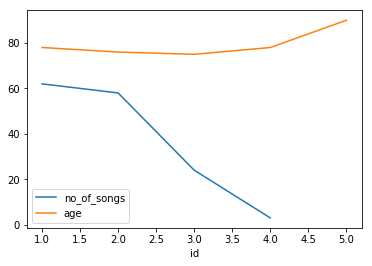

In [73]:
df[["no_of_songs", "age"]].plot()

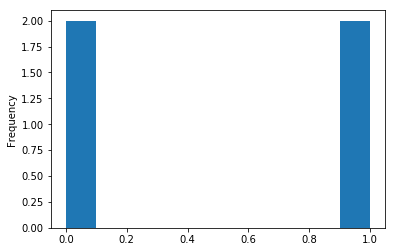

In [74]:
df["dead"].plot.hist()

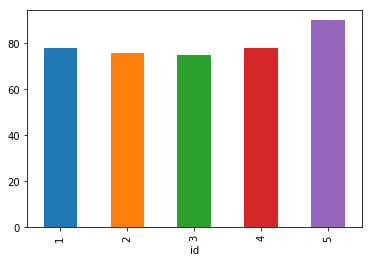

In [75]:
df["age"].plot.bar()

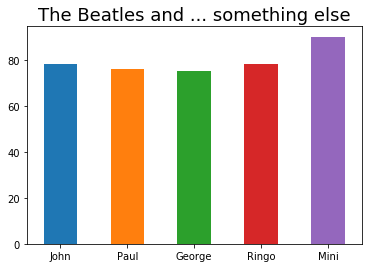

In [76]:
# some customization
ax = df["age"].plot.bar(rot=0)
ax.set_xticklabels(df.Name)
ax.set_xlabel("")
ax.set_title("The Beatles and ... something else", size=18);

Note that we are only scratching the surface of the plotting capabilities with pandas. Refer to the pandas online documention ([here](https://pandas.pydata.org/pandas-docs/stable/visualization.html)) for a comprehenisve overview.